Breakout session: SF Home sales
Get the data (SFShousing.csv):
http://bit.ly/16e8TfA
Hints: frequency for resampling 'M' : Monthly
how=['mean', 'count']

1. Read this data into a pandas dataframe. Convert the dates into the index and the dollar amounts of homesale prices ("Sale_Amount") into float values.
2. What were the total number of sales per month?
3. What was the average, min and max housing price per month?
4. (bonus) What was the average housing price for all houses sold over $100,000?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
!ls

Breakout_1_Pandas.ipynb
SFHousing.csv


In [4]:
### ----------------- Task 1 -------------------- ###
# Read this data into a pandas dataframe. Convert the dates into the index and the dollar amounts of homesale prices 
# ("Sale_Amount") into float values.

In [5]:
SFH = pd.read_csv("SFHousing.csv")

In [6]:
SFH.head(3)

,APN,ADDRESS,Date_Sale,Sale_Amount,Num_Bedrooms,BLKLOT
0,3570 101,566 SOUTH VAN NESS AVE #3,1/3/2012,"$425,500",2,3570101
1,3719 181,301 MISSION ST #22E,1/3/2012,"$1,160,000",2,3719181
2,8704 277,300 BERRY ST # 1612,1/3/2012,"$774,025",2,8704277


In [7]:
SFH.dtypes

APN             object
ADDRESS         object
Date_Sale       object
Sale_Amount     object
Num_Bedrooms     int64
BLKLOT          object
dtype: object

In [8]:
SFH.Date_Sale = pd.to_datetime(SFH.Date_Sale)

In [9]:
SFH.dtypes

APN                     object
ADDRESS                 object
Date_Sale       datetime64[ns]
Sale_Amount             object
Num_Bedrooms             int64
BLKLOT                  object
dtype: object

In [10]:
SFH.set_index("Date_Sale", inplace=True)

In [11]:
SFH.head(3)

,APN,ADDRESS,Sale_Amount,Num_Bedrooms,BLKLOT
Date_Sale,,,,,
2012-01-03,3570 101,566 SOUTH VAN NESS AVE #3,"$425,500",2,3570101
2012-01-03,3719 181,301 MISSION ST #22E,"$1,160,000",2,3719181
2012-01-03,8704 277,300 BERRY ST # 1612,"$774,025",2,8704277


In [12]:
type(SFH.Sale_Amount[0])

str

In [15]:
SFH['Sale_Amount'] = SFH['Sale_Amount'].replace( '[\$,]','', regex=True)

In [16]:
SFH['Sale_Amount'] = SFH['Sale_Amount'].astype(float)

In [18]:
SFH['Sale_Amount'].head(3)

Date_Sale
2012-01-03     425500
2012-01-03    1160000
2012-01-03     774025
Name: Sale_Amount, dtype: float64

In [17]:
type(SFH.Sale_Amount[0])

numpy.float64

In [19]:
### --------------------- Task2 ------------------------- ###
# What were the total number of sales per month?

In [20]:
SFH.head(3)

,APN,ADDRESS,Sale_Amount,Num_Bedrooms,BLKLOT
Date_Sale,,,,,
2012-01-03,3570 101,566 SOUTH VAN NESS AVE #3,425500,2,3570101
2012-01-03,3719 181,301 MISSION ST #22E,1160000,2,3719181
2012-01-03,8704 277,300 BERRY ST # 1612,774025,2,8704277


In [21]:
SFH['Sale_Amount'].resample('M',sum)

Date_Sale
2012-01-31     53476237
2012-02-29     60943387
2012-03-31     89563230
2012-04-30    109142657
2012-05-31    142617135
2012-06-30    124199434
2012-07-31    107375065
2012-08-31    354300447
2012-09-30    112736091
2012-10-31     70321138
2012-11-30     48159305
2012-12-31      3735000
Freq: M, Name: Sale_Amount, dtype: float64

In [22]:
t2 = SFH['Sale_Amount'].resample('M',sum)

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

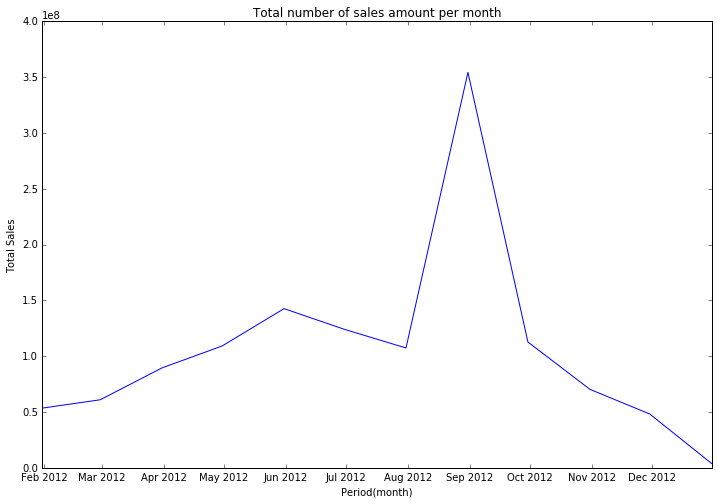

In [24]:
plt.plot(t2)
plt.title('Total number of sales amount per month')
plt.xlabel('Period(month)')
plt.ylabel('Total Sales')

In [25]:
### ------------- Task 3 ------------------------- ###
# What was the average, min and max housing price per month?

In [26]:
SFH['Sale_Amount'].resample('M', how = 'min')

Date_Sale
2012-01-31       1500
2012-02-29      92500
2012-03-31      10000
2012-04-30      29000
2012-05-31     245000
2012-06-30     208000
2012-07-31     208000
2012-08-31     208000
2012-09-30     119000
2012-10-31     208000
2012-11-30     430000
2012-12-31    1800000
Freq: M, Name: Sale_Amount, dtype: float64

In [27]:
SFH['Sale_Amount'].resample('M', how='max')

Date_Sale
2012-01-31     2004000
2012-02-29     2750000
2012-03-31     2515000
2012-04-30     3800000
2012-05-31     4750000
2012-06-30     1998000
2012-07-31     6000000
2012-08-31    16600000
2012-09-30     5100000
2012-10-31     3500000
2012-11-30     2200000
2012-12-31     1935000
Freq: M, Name: Sale_Amount, dtype: float64

In [28]:
SFH['Sale_Amount'].resample('M', how='mean')

Date_Sale
2012-01-31     786415.250000
2012-02-29     743212.036585
2012-03-31     852983.142857
2012-04-30     873141.256000
2012-05-31    1041000.985401
2012-06-30     850681.054795
2012-07-31    1073750.650000
2012-08-31    2013070.721591
2012-09-30    1084000.875000
2012-10-31     963303.260274
2012-11-30     982842.959184
2012-12-31    1867500.000000
Freq: M, Name: Sale_Amount, dtype: float64

In [29]:
SFH['Sale_Amount'].resample('M', how={'Average':'mean', 'Maximum':'max', 'Minimum':'min' })

,Average,Maximum,Minimum
Date_Sale,,,
2012-01-31,786415.250000,2004000,1500
2012-02-29,743212.036585,2750000,92500
2012-03-31,852983.142857,2515000,10000
2012-04-30,873141.256000,3800000,29000
2012-05-31,1041000.985401,4750000,245000
2012-06-30,850681.054795,1998000,208000
2012-07-31,1073750.650000,6000000,208000
2012-08-31,2013070.721591,16600000,208000
2012-09-30,1084000.875000,5100000,119000


In [30]:
t3 = SFH['Sale_Amount'].resample('M', how={'Average':'mean', 'Maximum':'max', 'Minimum':'min' })

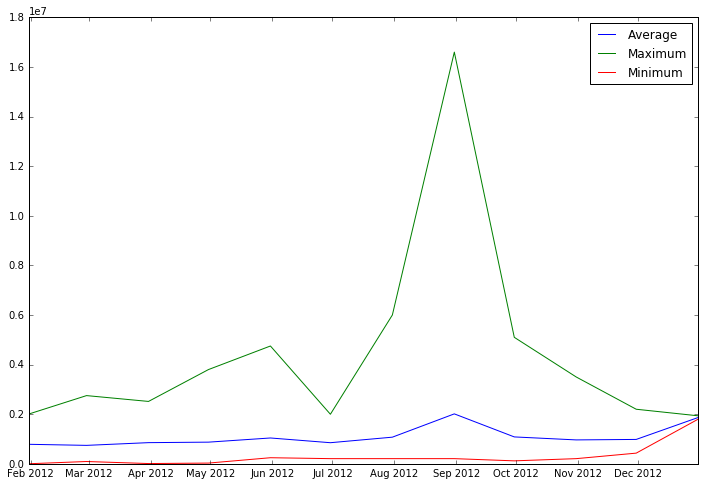

In [31]:
p1, = plt.plot(t3['Average'])
p2, = plt.plot(t3['Maximum'])
p3, = plt.plot(t3['Minimum'])
legend([p1, p2, p3], ["Average", "Maximum", "Minimum"])

In [32]:
### ----------------- Task 4 ------------------------ ###
#(bonus) What was the average housing price for all houses sold over $1,000,000?

In [33]:
SFH.shape

(1167, 5)

In [34]:
Over1000 = SFH[SFH['Sale_Amount'] > 1000000]

In [35]:
Over1000.shape

(339, 5)

In [36]:
Over1000.Sale_Amount.mean()

2081109.5929203539

In [37]:
Over1000['Sale_Amount'].resample('M', how='mean')

Date_Sale
2012-01-31    1467266.666667
2012-02-29    1474153.846154
2012-03-31    1463141.785714
2012-04-30    1396667.472222
2012-05-31    1695281.632653
2012-06-30    1444393.939394
2012-07-31    1878427.419355
2012-08-31    4832233.833333
2012-09-30    1593454.785714
2012-10-31    1510637.500000
2012-11-30    1393539.062500
2012-12-31    1867500.000000
Freq: M, Name: Sale_Amount, dtype: float64

In [38]:
t4 = Over1000['Sale_Amount'].resample('M', how='mean')

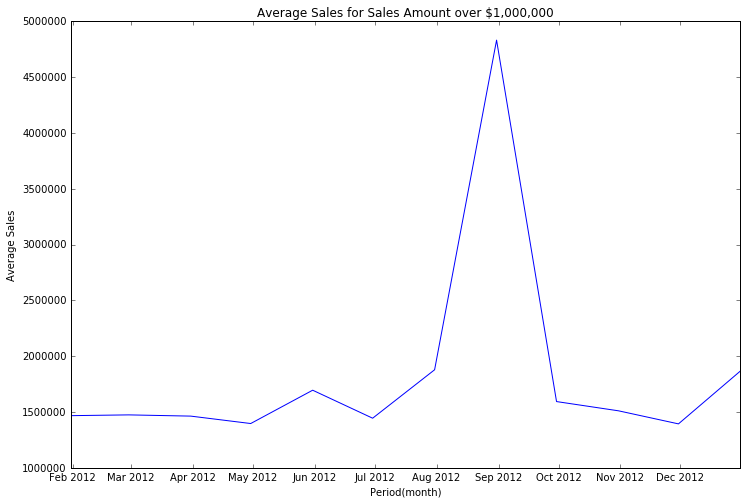

In [39]:
plt.plot(t4)
plt.title('Average Sales for Sales Amount over $1,000,000')
plt.xlabel('Period(month)')
plt.ylabel('Average Sales')